### **TASK 1 - Prediction using Unsupervised**

Predict the percentage of a student based on number of study hours

#### **Areesha Kashif**

In [65]:
import pandas as pd                                                                                          #load data

score = pd.read_csv('student_per.csv')
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*1) 25 entries*  
*2) No null-values*

In [67]:
score.corr()                                                                                                        #co-relation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


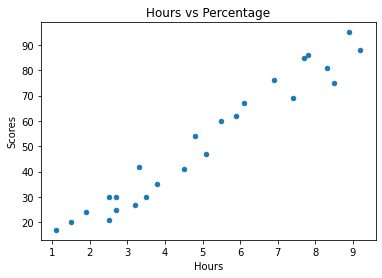

In [68]:
import matplotlib.pyplot as plt 

score.plot(kind='scatter', x='Hours', y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [69]:
# Defining X & y
X=score.iloc[:,:-1].values
y=score.iloc[:,1].values
print(X[:5], y[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]] [21 47 27 75 30]


In [70]:
from sklearn.model_selection import train_test_split                                                    # Split data between test & train

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [71]:
from sklearn.linear_model import LinearRegression                                                                        # train model

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [72]:
pred_y = reg_model.predict(X_test)                                                                                            # predicted scores
pred_scores = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Scores': [k for k in pred_y]})
pred_scores

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


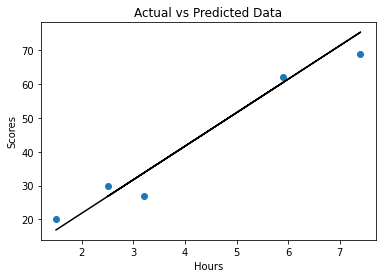

In [73]:
plt.scatter(x=X_test, y=y_test)                                                                          # plot actual and predicted scores
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted Data',)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [74]:
from sklearn.metrics import mean_absolute_error                             #check accuracy

print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


In [75]:
hours_studied=[9.25]
pred_score=reg_model.predict([hours_studied])
print("Expected percentage if studied for 9.25 hours:  ", round(pred_score[0], 2), "%")

Expected percentage if studied for 9.25 hours:   93.69 %
